# LOAN DELINQUENCY PREDICTION

 ### Data Dictionary:
 - loan_id : Unique loan ID
 - source : Loan origination channel
 - financial_institution : Name of the bank
 - interest_rate : Loan interest rate
 - unpaidprincipalbal : Loan unpaid principal balance
 - loan_term : Loan term (in days)
 - origination_date : Loan origination date (YYYY-MM-DD)
 - firstpaymentdate : First instalment payment date
 - loantovalue : Loan to value ratio
 - numberofborrowers : Number of borrowers
 - debttoincome_ratio : Debt-to-income ratio
 - borrowercreditscore : Borrower credit score
 - loan_purpose : Loan purpose
 - insurance_percent : Loan Amount percent covered by insurance
 - co-borrowercreditscore :	Co-borrower credit score
 - insurance_type :	0 - Premium paid by borrower, 1 - Premium paid by Lender
 - m1 to m12 : Month-wise loan performance (deliquency in months)
 - m13 : target, loan deliquency status (0 = non deliquent, 1 = deliquent)

## Understanding Banking terms
- Debt to income ratio:
> measures the amount of income a person or organization generates in order to service a debt. A low DTI ratio indicates sufficient income relative to debt servicing, and makes a borrower more attractive.

- Loan to Value ratio : 
> A loan-to-value (LTV) ratio compares the amount of a loan you're hoping to borrow against the appraised value of the property you want to buy. Lenders use LTVs to determine how risky a loan is and whether they'll approve or deny it. A higher LTV ratio suggests more risk because there's a higher chance of default. The more money a lender gives you, the higher your LTV ratio and the more risk they’re taking. If you're considered a higher risk for the lender, this usually means that:
>1. It’s harder to get approved for loans.
>2. You might have to pay a higher interest rate.
>3. You might have to pay additional costs, such as mortgage insurance.

- Insurance percent
>a provision in a health insurance contract stipulating that the insurer and insured will share covered losses in agreed proportions. For example, the insurer may be required to pay 80 percent of the insured's hospital costs with the insured responsible for the remainder.
>>

## Sections of the book
 [1. Importing libraries](#1)
 
 [2. Basic Data Study](#2)
 
 [3. Univariate analysis](#3)
 
 [4. Hypothesis Testing - Bivariate analysis](#4)
 
 [5. Data Processing & Feature Engineering](#5)
 
 [6. Sampling](#6)
 
 [7. Model Building](#7)
  
 [8. Scores](#8)
 
 [9. Test Data Evaluation](#9)
 

<a id = '1'></a>

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from os.path import abspath, dirname
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

<a id = '2'></a>

# BASIC DATA STUDY

In [2]:
#Reading the datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.loan_id.nunique()

92846

In [4]:
#Making a copy to keep the original data

train_original = train.copy()
test_original = test.copy()

In [5]:
#Checking the shape of the datasets

train.shape

(92846, 30)

In [6]:
test.shape

(23212, 29)

In [7]:
train.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,...,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,...,0,0,0,0,0,0,0,0,0,0
2,83866,481942560913,Y,OTHER,4.500,90000,360,2012-01-01,03/2012,69,...,0,0,0,0,0,0,0,0,0,0
3,92311,676780245612,Y,"Turner, Baldwin and Rhodes",4.500,47000,240,2012-02-01,04/2012,75,...,1,0,0,0,0,0,0,0,0,0
4,72274,433043514697,X,OTHER,4.875,177000,360,2012-01-01,03/2012,80,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.tail()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
92841,64877,952892082095,X,Browning-Hart,3.875,68000,180,2012-02-01,04/2012,57,...,0,0,0,0,0,0,0,0,0,0
92842,4714,405456561770,X,OTHER,3.000,67000,180,2012-02-01,04/2012,35,...,0,0,0,0,0,0,0,0,0,0
92843,108500,643283061619,X,OTHER,4.500,81000,360,2012-02-01,04/2012,75,...,0,0,0,0,0,0,0,0,0,0
92844,41187,450225782159,X,OTHER,3.875,115000,180,2012-02-01,04/2012,72,...,0,0,0,0,0,0,0,0,0,0
92845,31626,632833546025,X,OTHER,3.500,77000,180,2012-02-01,04/2012,75,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#The unnamed column can be considered as an ID column - used in submission file

train_ID = train['Unnamed: 0']
test_ID = test['Unnamed: 0']

In [10]:
#Can be dropped as it is not used in model building

train.drop('Unnamed: 0', axis = 1, inplace = True)
test.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
def basic_details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Type'] = df.dtypes
    b['Unique Values'] = df.nunique()
    return b
basic_details(train)

,Null Values,Data Type,Unique Values
loan_id,0,int64,92846
source,0,object,3
financial_institution,0,object,19
interest_rate,0,float64,813
unpaid_principal_bal,0,int64,637
loan_term,0,int64,127
origination_date,0,object,3
first_payment_date,0,object,4
loan_to_value,0,int64,92
number_of_borrowers,0,float64,2


In [12]:
#Storing numerical columns and categorical columns in separate variables

num_col_train = train.select_dtypes(include=[np.number])
cat_col_train = train.select_dtypes(exclude=[np.number])
print('Number of numerical columns: {}'.format(len(num_col_train.columns)))
print('Number of categorical columns: {}'.format(len(cat_col_train.columns)))

Number of numerical columns: 24
Number of categorical columns: 5


In [13]:
#For test dataset

num_col_test = test.select_dtypes(include=[np.number])
cat_col_test = test.select_dtypes(exclude=[np.number])

In [14]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,9.284600e+04,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,...,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000
mean,5.491631e+11,3.869010,208047.325679,292.362816,67.424606,1.592583,30.737792,769.963348,2.801338,459.209982,...,0.001993,0.003231,0.003167,0.003845,0.004577,0.005256,0.006484,0.007098,0.007916,0.005439
std,2.597886e+11,0.461126,114625.547432,89.723293,17.326684,0.491356,9.730489,42.311377,8.123954,382.068572,...,0.053589,0.074190,0.080327,0.091753,0.107406,0.123994,0.145742,0.158699,0.171575,0.073550
min,1.000064e+11,2.250000,14000.000000,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.241490e+11,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.483891e+11,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.740564e+11,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,915000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,11.000000,1.000000


In [15]:
train.describe(include = np.object)

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,92846,92846,92846,92846,92846
unique,3,19,3,4,3
top,X,OTHER,2012-02-01,04/2012,A23
freq,51067,39766,41951,42282,46820


### Observations:
- Loan_ID does not contribute to the outcome
- interest rate seems to be fairly distributed(check)
- unpaid_principal seems to be right skewed (check)
- loan term - right skewed
- loan_to_value ratio has a stark difference - there seem to be outliers on the lower side(check)
- num of borrowers:2 > 1
- DTI Ratio seems to be normally distributed
- borrower_credit_score has outliers on the lower side
- co-borrowers credit score is lesser than the borrowers
- Data is highly imbalanced

In [16]:
#Loan ID is unique for every row and the prediction does not depend on it at all

train.drop('loan_id', axis = 1, inplace = True)
test.drop('loan_id', axis = 1, inplace = True)

<a id = '3'></a>

# UNIVARIATE ANALYSIS

### Categorical Columns

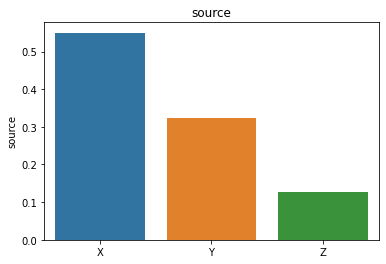

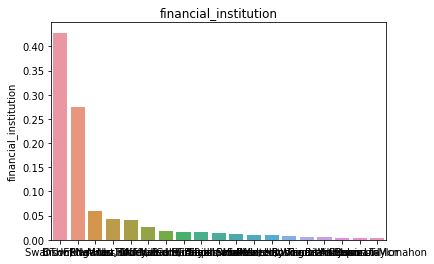

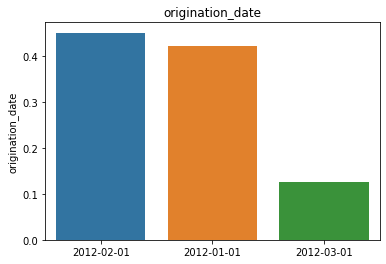

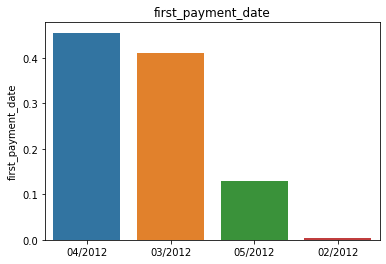

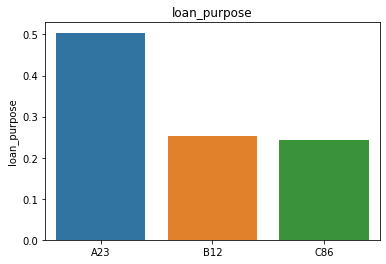

In [17]:
for cname in cat_col_train:
    valueCounts = train[cname].value_counts(normalize = True)
    sns.barplot(valueCounts.index, valueCounts).set_title(cname)
    plt.show()

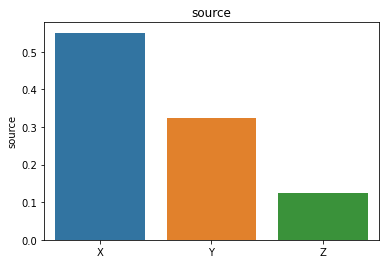

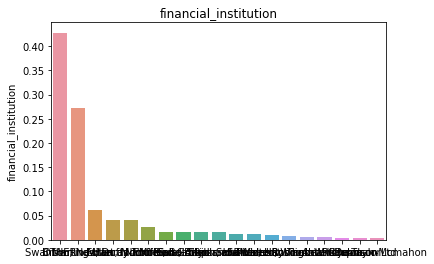

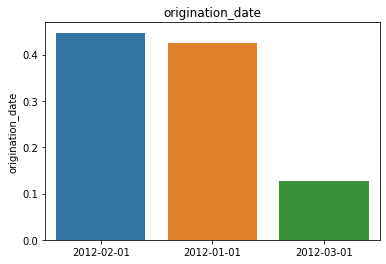

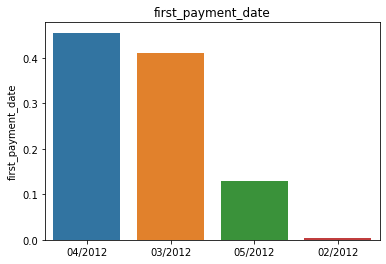

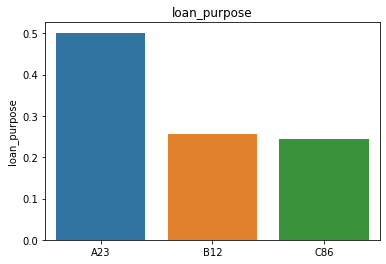

In [18]:
#Test dataset

for cname in cat_col_train:
    valueCounts = test[cname].value_counts(normalize = True)
    sns.barplot(valueCounts.index, valueCounts).set_title(cname)
    plt.show()

### Observations:
- 50% of Source : X
- most of the loans were approved in the month of January
- Only a few loans were paid in the second month
- Maximum loans were paid in the month of april
- A23 was the biggest reason for taking loans

### Numerical features

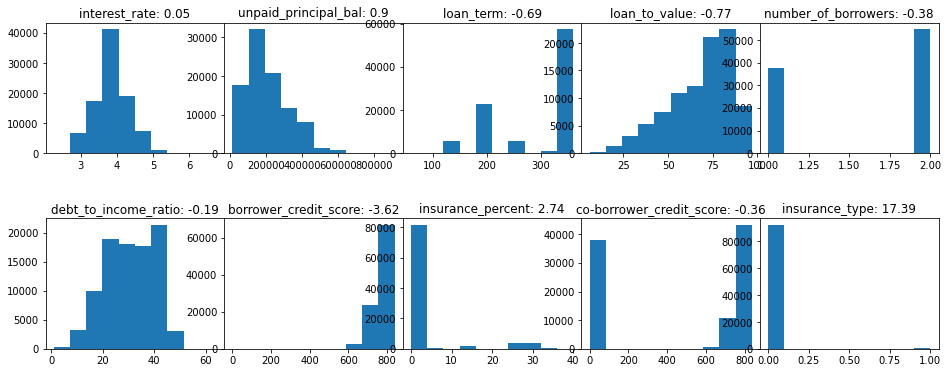

In [19]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in num_col_train.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(num_col_train[i])
    axs[j].set_title(i+': '+str(np.round(num_col_train[i].skew(),2)))

**If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric**

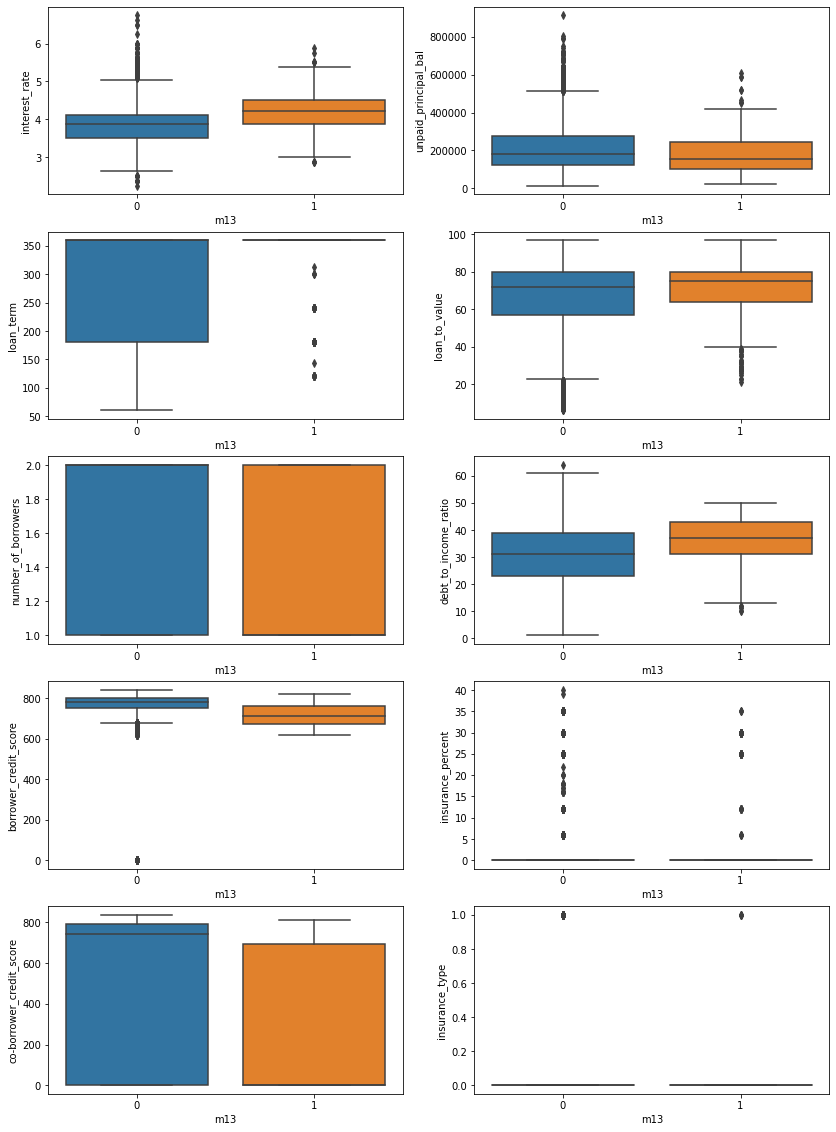

In [20]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in num_col_train.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'm13', y = i, data =num_col_train,ax=j)

- If 'borrower_credit_score is low, delinquency chances are high.
- If 'debt_to_income_ratio' is high, delinquency chances are high.
- If 'interest_rate' is high, delinquency chances are high.

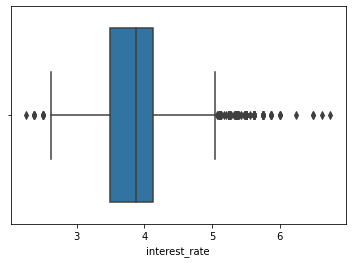

In [21]:
#Boxplot for interest rate
sns.boxplot(train['interest_rate'])
plt.show()

**The datapoints outside interest 6 in the train dataset are clearly outliers**
- There are datapoints below 3 in the test dataset. Only one point with 2.25 as interest rate is an outlier on the lower side

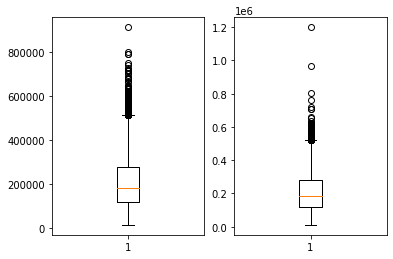

In [22]:
#Boxplot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.boxplot(train['unpaid_principal_bal'])
ax2.boxplot(test['unpaid_principal_bal']);

**As compared to test dataset the train datset has no outliers**
- Unpaid Principal Balance has to be fed as a continuous variable so that it can predict on unseen data in the test dataset

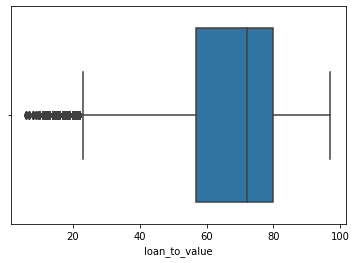

In [23]:
#Boxplot for train dataset

sns.boxplot(train['loan_to_value']);

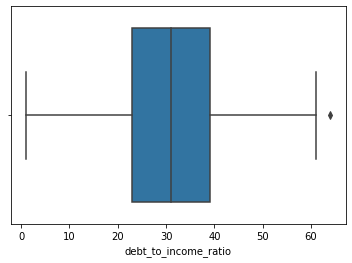

In [24]:
sns.boxplot(train['debt_to_income_ratio'])

**There is an outlier in the train dataset. Try feature engineering this column**

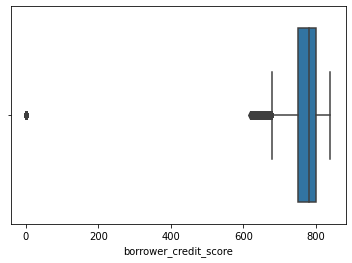

In [25]:
sns.boxplot(train['borrower_credit_score']);

**Extreme Outlier in the datasets on the lower side. There are rows in the test data that do not exist in the train data. It is a continuous Variable. Also, it'll be averaged with Co-borrower credit score so doesn't make much difference**

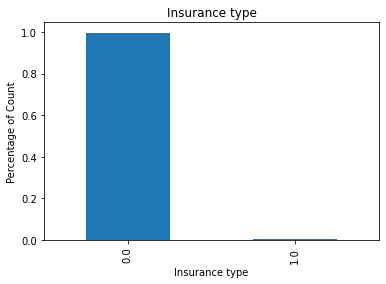

In [26]:
train['insurance_type'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Insurance type')
plt.xlabel('Insurance type')
plt.ylabel('Percentage of Count');

**Drop this column**

### Insurance percent : Loan Amount percent covered by insurance

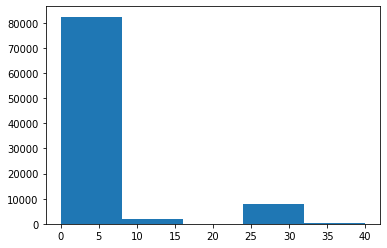

In [27]:
plt.hist(train['insurance_percent'], bins = 5);

In [28]:
months = train[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']]
def month_delinq(df):
    b = pd.DataFrame()
    b['#Unique Values'] = df.nunique()
    return b
month_delinq(months)

,#Unique Values
m1,4
m2,4
m3,5
m4,5
m5,7
m6,7
m7,8
m8,9
m9,10
m10,11


## Target Variable

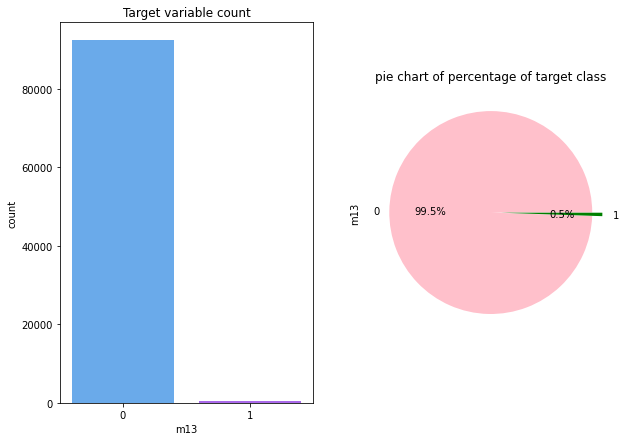

In [29]:
##Target Variable

plt.subplot(1,2,1)
sns.countplot(train['m13'],palette = 'cool')
plt.title("Target variable count")



plt.subplot(1,2,2)
count = train['m13'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',
               colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], 
               title = "pie chart of percentage of target class")
plt.show()

<a id = '4'></a>

# BIVARIATE ANALYSIS

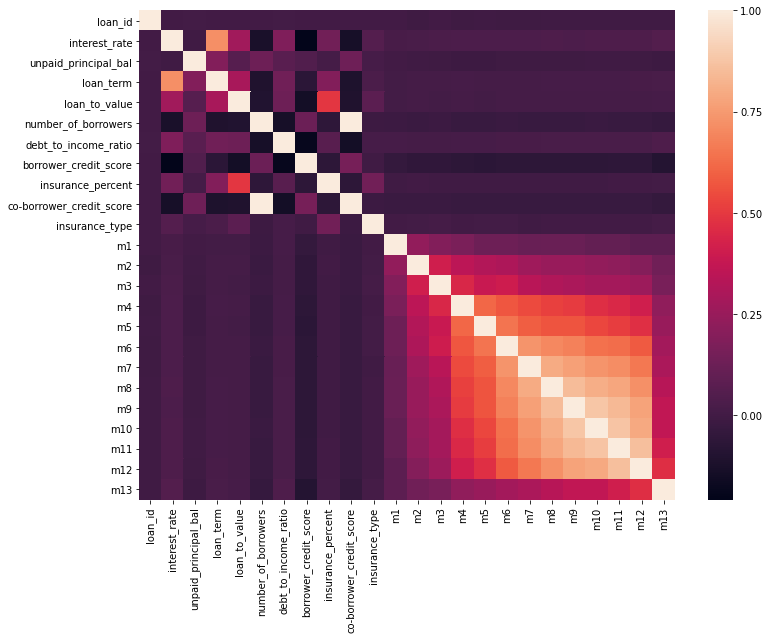

In [30]:
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(num_col_train.corr());

- High Multicollinearity between m1 to m12
- number of borrowers directly correlated to co_borrower credit score (average out the credit scores/ drop the column)
- High correlation between loan term and interest rate

## Categorical columns

In [31]:
for i in cat_col_train.columns.to_list():
    print(pd.crosstab(train[i],train['m13']))

m13         0    1
source            
X       50826  241
Y       29821  197
Z       11694   67
m13                              0    1
financial_institution                  
Anderson-Taylor                374    3
Browning-Hart                25402  134
Chapman-Mcmahon                304    0
Cole, Brooks and Vincent      1282    8
Edwards-Hoffman               3866   37
Martinez, Duffy and Bird      3727   19
Miller, Mcclure and Allen     2535   18
Nicholson Group               1723   10
OTHER                        39554  212
Richards-Walters              1165    4
Richardson Ltd                 383    1
Romero, Woods and Johnson      595    1
Sanchez, Hays and Wilkerson    678    1
Sanchez-Robinson               955    1
Suarez Inc                    1419    3
Swanson, Newton and Miller    5409   35
Taylor, Hunt and Rodriguez     995    3
Thornton-Davis                 507    3
Turner, Baldwin and Rhodes    1468   12
m13                   0    1
origination_date            
2012-01

#### Delinquency when :
- Source X > Y > Z
- financial institutions : OTHER > Browning heart
- origination date : 1/1 > 2/1
- first payment date : 4/12
- loan purpose : A23 / B12

### Categorical columns VS Target Variable(m13)
 1. Source
 >Does the channel of loan determine the ease of repayment? 
 
 2. Financial Institution
 >Which Financial Institution has better customers who repay on time?
 
 3. Loan Purpose
 >The loan purpose can be related to delinquency status. First check the correlation of Loan Purpose with Unpaid Principal Balance (Which Loan Purpose needs more money?). The higher the amount of payment, the higher the probability of delinquency. Therefore, the loan purpose that demands more money will have higher delinquency rate.
 

### Numerical columns VS Target Variable(m13)
 1. Interest Rate
 >Higher the interest rate, more the difficulty in paying back the loan. However, check the relation between interest rate and unpaid balance principal
 
 2. Unpaid Principal Balance
 
 3. Loan Term
 
 4. LTV Ratio
 
 5. Num. of borrowers
 
 6. DTI Ratio
 
 7. Avg. Credit Score
 
 8. Insurance Precent
 
 9. Insurance Type

<a id = '5'></a>

# DATA CLEANING AND PROCESSING

In [32]:
#Drop outliers

drop_rows = train[(train['interest_rate'] > 6) | (train['debt_to_income_ratio'] > 60) | (train['insurance_percent'] >= 39)].index
train.drop(drop_rows, inplace = True)

### Label encoding financial institutions

In [33]:
#Label Encoding financial institutions

from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
a  = ['financial_institution']
for i in np.arange(len(a)):
    train[a[i]] = lm.fit_transform(train[a[i]])
    
for i in np.arange(len(a)):
    test[a[i]] = lm.fit_transform(test[a[i]])

## One Hot Encoding source and loan_purpose

In [34]:
#Source encoding
source_dummies = pd.get_dummies(train['source'])
train = pd.concat([train,source_dummies], axis = 'columns')
#dropping Holding_Policy_Type column and a dummy variable to avoid the dummy variable trap
train.drop(['source','Z'], axis = 'columns', inplace = True)

In [35]:
#Test dataset
source_test_dummies = pd.get_dummies(test['source'])
test = pd.concat([test,source_test_dummies], axis = 'columns')
#dropping source column and a dummy variable to avoid the dummy variable trap
test.drop(['source','Z'], axis = 'columns', inplace = True)

In [36]:
#loan_purpose
purpose_dummies = pd.get_dummies(train['loan_purpose'])
train = pd.concat([train,purpose_dummies], axis = 'columns')
#dropping loan_purpose column and a dummy variable to avoid the dummy variable trap
train.drop(['loan_purpose','C86'], axis = 'columns', inplace = True)

In [37]:
#loan_purpose - test
purpose_test_dummies = pd.get_dummies(test['loan_purpose'])
test = pd.concat([test,purpose_test_dummies], axis = 'columns')
#dropping loan_purpose column and a dummy variable to avoid the dummy variable trap
test.drop(['loan_purpose','C86'], axis = 'columns', inplace = True)

In [38]:
train.columns

Index(['financial_institution', 'interest_rate', 'unpaid_principal_bal',
       'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'X', 'Y', 'A23', 'B12'],
      dtype='object')

In [39]:
num_col_train = train.select_dtypes(include=[np.number])
cat_col_train = train.select_dtypes(exclude=[np.number])
print('Number of numerical columns: {}'.format(len(num_col_train.columns)))
print('Number of categorical columns: {}'.format(len(cat_col_train.columns)))

Number of numerical columns: 28
Number of categorical columns: 2


In [40]:
#Dropping redundant columns

train.drop(['first_payment_date', 'origination_date', 'insurance_percent', 'number_of_borrowers'], axis = 1, inplace = True)
test.drop(['first_payment_date', 'origination_date', 'insurance_percent', 'number_of_borrowers'], axis = 1, inplace = True)

In [41]:
#Insurance type column is highly imbalanced and doesn't contribute much to model building
train.drop('insurance_type', axis = 1, inplace = True)
test.drop('insurance_type', axis = 1, inplace = True)

### Averaging the credit scores in case of 2 borrowers

In [42]:
#Average credit Score
train['avg_credit_score'] = (train['borrower_credit_score']+train['co-borrower_credit_score'])/2

#Dropping individual columns
train.drop('borrower_credit_score', axis= 1, inplace = True)
train.drop('co-borrower_credit_score', axis = 1, inplace = True)

In [43]:
#Test dataset

#Average credit Score
test['avg_credit_score'] = (test['borrower_credit_score']+test['co-borrower_credit_score'])/2

#Dropping individual columns
test.drop('borrower_credit_score', axis= 1, inplace = True)
test.drop('co-borrower_credit_score', axis = 1, inplace = True)

In [44]:
#Drop loan term

train.drop('loan_term', axis = 1, inplace = True)
test.drop('loan_term', axis = 1, inplace = True)

In [45]:
train.describe()

,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,m1,m2,m3,m4,m5,...,m9,m10,m11,m12,m13,X,Y,A23,B12,avg_credit_score
count,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,...,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.00000,92837.000000,92837.000000,92837.000000
mean,6.508375,3.868864,208052.812995,67.423043,30.736980,0.003178,0.002057,0.001853,0.001993,0.003231,...,0.005246,0.006484,0.007098,0.007917,0.005440,0.549996,0.32333,0.504282,0.252723,614.601560
std,4.444594,0.460734,114625.350707,17.326579,9.729672,0.062450,0.049623,0.050599,0.053592,0.074193,...,0.123957,0.145749,0.158706,0.171584,0.073553,0.497497,0.46775,0.499984,0.434576,195.469616
min,0.000000,2.250000,14000.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,3.500000,120000.000000,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,393.000000
50%,8.000000,3.875000,182000.000000,72.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,743.000000
75%,8.000000,4.125000,278000.000000,80.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,789.000000
max,18.000000,6.000000,915000.000000,97.000000,58.000000,3.000000,3.000000,4.000000,5.000000,6.000000,...,10.000000,11.000000,11.000000,11.000000,1.000000,1.000000,1.00000,1.000000,1.000000,830.500000


### StandardScaler for unpaid_principal_bal and avg_credit_score

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#Fit on training data column
scale = ss.fit(train[['avg_credit_score']])
#Transform
train['avg_credit_score'] = scale.transform(train[['avg_credit_score']])
train.describe()

,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,m1,m2,m3,m4,m5,...,m9,m10,m11,m12,m13,X,Y,A23,B12,avg_credit_score
count,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,...,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.00000,92837.000000,92837.000000,9.283700e+04
mean,6.508375,3.868864,208052.812995,67.423043,30.736980,0.003178,0.002057,0.001853,0.001993,0.003231,...,0.005246,0.006484,0.007098,0.007917,0.005440,0.549996,0.32333,0.504282,0.252723,2.627710e-16
std,4.444594,0.460734,114625.350707,17.326579,9.729672,0.062450,0.049623,0.050599,0.053592,0.074193,...,0.123957,0.145749,0.158706,0.171584,0.073553,0.497497,0.46775,0.499984,0.434576,1.000005e+00
min,0.000000,2.250000,14000.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-3.144248e+00
25%,1.000000,3.500000,120000.000000,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.133694e+00
50%,8.000000,3.875000,182000.000000,72.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,6.568751e-01
75%,8.000000,4.125000,278000.000000,80.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,8.922071e-01
max,18.000000,6.000000,915000.000000,97.000000,58.000000,3.000000,3.000000,4.000000,5.000000,6.000000,...,10.000000,11.000000,11.000000,11.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.104517e+00


In [47]:
ss = StandardScaler()

scale = ss.fit(test[['avg_credit_score']])

test['avg_credit_score'] = scale.transform(test[['avg_credit_score']])
test.describe()

,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,m1,m2,m3,m4,m5,...,m8,m9,m10,m11,m12,X,Y,A23,B12,avg_credit_score
count,23212.000000,23212.000000,2.321200e+04,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,...,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,2.321200e+04
mean,6.552731,3.868762,2.089418e+05,67.461270,30.760296,0.003274,0.002068,0.002456,0.002930,0.004739,...,0.005816,0.005773,0.007151,0.007151,0.008659,0.551051,0.324660,0.501551,0.255040,1.303503e-16
std,4.476105,0.460605,1.149227e+05,17.151488,9.732222,0.066857,0.057933,0.071560,0.088502,0.110122,...,0.133588,0.143989,0.158731,0.178652,0.202230,0.497398,0.468258,0.500008,0.435893,1.000022e+00
min,0.000000,2.375000,1.100000e+04,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.159653e+00
25%,1.000000,3.500000,1.200000e+05,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.139629e+00
50%,8.000000,3.875000,1.830000e+05,72.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.545230e-01
75%,8.000000,4.125000,2.800000e+05,80.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.880964e-01
max,18.000000,5.875000,1.200000e+06,97.000000,56.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.096002e+00


In [48]:
ss = StandardScaler()
#Fit on training data column
scale = ss.fit(test[['unpaid_principal_bal']])
#Transform
test['unpaid_principal_bal'] = scale.transform(test[['unpaid_principal_bal']])
test.describe()

,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,m1,m2,m3,m4,m5,...,m8,m9,m10,m11,m12,X,Y,A23,B12,avg_credit_score
count,23212.000000,23212.000000,2.321200e+04,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,...,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,2.321200e+04
mean,6.552731,3.868762,-4.113354e-17,67.461270,30.760296,0.003274,0.002068,0.002456,0.002930,0.004739,...,0.005816,0.005773,0.007151,0.007151,0.008659,0.551051,0.324660,0.501551,0.255040,1.303503e-16
std,4.476105,0.460605,1.000022e+00,17.151488,9.732222,0.066857,0.057933,0.071560,0.088502,0.110122,...,0.133588,0.143989,0.158731,0.178652,0.202230,0.497398,0.468258,0.500008,0.435893,1.000022e+00
min,0.000000,2.375000,-1.722428e+00,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.159653e+00
25%,1.000000,3.500000,-7.739440e-01,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.139629e+00
50%,8.000000,3.875000,-2.257375e-01,72.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.545230e-01
75%,8.000000,4.125000,6.183265e-01,80.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.880964e-01
max,18.000000,5.875000,8.623881e+00,97.000000,56.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.096002e+00


In [49]:
ss = StandardScaler()
#Fit on training data column
scale = ss.fit(train[['unpaid_principal_bal']])
#Transform
train['unpaid_principal_bal'] = scale.transform(train[['unpaid_principal_bal']])
train.describe()

,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,m1,m2,m3,m4,m5,...,m9,m10,m11,m12,m13,X,Y,A23,B12,avg_credit_score
count,92837.000000,92837.000000,9.283700e+04,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,...,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.000000,92837.00000,92837.000000,92837.000000,9.283700e+04
mean,6.508375,3.868864,5.599608e-17,67.423043,30.736980,0.003178,0.002057,0.001853,0.001993,0.003231,...,0.005246,0.006484,0.007098,0.007917,0.005440,0.549996,0.32333,0.504282,0.252723,2.627710e-16
std,4.444594,0.460734,1.000005e+00,17.326579,9.729672,0.062450,0.049623,0.050599,0.053592,0.074193,...,0.123957,0.145749,0.158706,0.171584,0.073553,0.497497,0.46775,0.499984,0.434576,1.000005e+00
min,0.000000,2.250000,-1.692940e+00,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-3.144248e+00
25%,1.000000,3.500000,-7.681834e-01,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.133694e+00
50%,8.000000,3.875000,-2.272879e-01,72.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,6.568751e-01
75%,8.000000,4.125000,6.102277e-01,80.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,8.922071e-01
max,18.000000,6.000000,6.167493e+00,97.000000,58.000000,3.000000,3.000000,4.000000,5.000000,6.000000,...,10.000000,11.000000,11.000000,11.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.104517e+00


<a id = '6'></a>

# SAMPLING

### ADASYN SAMPLING

In [50]:
from collections import Counter
x = train.drop(columns='m13', axis = 1)
y = train['m13']

print(Counter(y))

Counter({0: 92332, 1: 505})


In [51]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN()
x_adasyn, y_adasyn = sm.fit_sample(x, y)

print(Counter(y_adasyn))

Using TensorFlow backend.


Counter({0: 92332, 1: 92248})


### Splitting into train and validation set - StratifiedKFold

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
skf_adasyn = StratifiedKFold(n_splits=5, random_state=21)
skf_adasyn.get_n_splits(x_adasyn, y_adasyn)

5

In [54]:
for train_index, test_index in skf_adasyn.split(x_adasyn, y_adasyn):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_adasyn_st_train, X_adasyn_st_test = x_adasyn[train_index], x_adasyn[test_index]
    y_adasyn_st_train, y_adasyn_st_test = y_adasyn[train_index], y_adasyn[test_index]

TRAIN: [ 18573  18574  18575 ... 184577 184578 184579] TEST: [     0      1      2 ... 110779 110780 110781]
TRAIN: [     0      1      2 ... 184577 184578 184579] TEST: [ 18573  18574  18575 ... 129229 129230 129231]
TRAIN: [     0      1      2 ... 184577 184578 184579] TEST: [ 37143  37144  37145 ... 147679 147680 147681]
TRAIN: [     0      1      2 ... 184577 184578 184579] TEST: [ 55696  55697  55698 ... 166128 166129 166130]
TRAIN: [     0      1      2 ... 166128 166129 166130] TEST: [ 74270  74271  74272 ... 184577 184578 184579]


<a id = '7'></a>

# MODEL BUILDING

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg_adasyn = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg_adasyn.fit(X_adasyn_st_train,y_adasyn_st_train)
y_adasyn_log = logreg_adasyn.predict(X_adasyn_st_test)

## RandomForest Classifier

In [56]:
from sklearn.ensemble.forest import RandomForestClassifier
rf_adasyn =RandomForestClassifier(random_state=21,max_depth= 19 ,min_samples_split= 2 ,n_estimators= 141,
                                          min_samples_leaf=1, criterion='entropy',class_weight= {0: 0.8, 1:1})
rf_adasyn.fit(X_adasyn_st_train, y_adasyn_st_train)
y_adasyn_rf = rf_adasyn.predict(X_adasyn_st_test)

## DecisionTrees

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_adasyn= DecisionTreeClassifier()
dt_adasyn.fit(X_adasyn_st_train, y_adasyn_st_train)
y_adasyn_dt = dt_adasyn.predict(X_adasyn_st_test)

## XGBoost

In [58]:
from xgboost import XGBClassifier
xgb_adasyn = XGBClassifier()
xgb_adasyn.fit(X_adasyn_st_train, y_adasyn_st_train)
y_adasyn_xgb = xgb_adasyn.predict(X_adasyn_st_test)

## AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_adasyn = AdaBoostClassifier(n_estimators=100, random_state=77)
ada_adasyn.fit(X_adasyn_st_train, y_adasyn_st_train)
y_adasyn_ada = ada_adasyn.predict(X_adasyn_st_test)

<a id = '8'></a>

# SCORES

**F1 score is the evaluation metric**

In [60]:
from sklearn.metrics import f1_score

In [61]:
print('Score with LogisticRegression: {}'.format(f1_score(y_adasyn_st_test, y_adasyn_log)))

Score with LogisticRegression: 0.853278836328665


In [62]:
print('Score with RandomForest: {}'.format(f1_score(y_adasyn_st_test, y_adasyn_rf)))

Score with RandomForest: 0.9897217210650048


In [63]:
print('Score with DecisionTrees: {}'.format(f1_score(y_adasyn_st_test, y_adasyn_dt)))

Score with DecisionTrees: 0.983351103091938


In [64]:
print('Score with XGBoost: {}'.format(f1_score(y_adasyn_st_test, y_adasyn_xgb)))

Score with XGBoost: 0.9768533863661474


In [65]:
print('Score with AdaBoost: {}'.format(f1_score(y_adasyn_st_test, y_adasyn_ada)))

Score with AdaBoost: 0.9729385369636873


## RandomForest is the best model. Using GridSearchCV to find the best estimator for the model

from sklearn.model_selection import GridSearchCV

#max_depth = 1 to 20 with interval of 2
#n_estimators = 1 to 200 with interval of 20
paramgrid = {'max_depth' : list(range(1,20,2)), 'n_estimators' : list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 21), paramgrid)

## Best parameters estimated:
    max_depth : 19
    n_estimators : 141

rf_adasyn_final =RandomForestClassifier(random_state=21,max_depth= 19 ,min_samples_split= 2 ,n_estimators= 141,
                                          min_samples_leaf=1,  criterion='gini')
rf_adasyn_final.fit(X_adasyn_st_train, y_adasyn_st_train)
y_rf = rf_adasyn_final.predict(X_adasyn_st_test)

<a id = '9'></a>

# TEST DATA EVALUATION

In [66]:
test_y = rf_adasyn.predict(test)

In [67]:
submission_file = pd.DataFrame(test_y,index = test_ID,columns = ['m13'])

In [68]:
submission_file.head()

,m13
Unnamed: 0,
68426,0
49544,0
96751,0
112058,0
85610,0


In [69]:
submission_file.to_csv('submission_file.csv', index = True)